# Saurabh Gupta

# part 1

## 1 Five V’s of Big Data

* **Volume**: \
It refers to the size of Big Data. Data can be considered Big Data or not is based on the volume. The rapidly increasing volume data is due to cloud-computing traffic, IoT, mobile traffic etc.

* **Velocity**: \
It refers to the speed at which the data is getting accumulated. This is mainly due to IoTs, mobile data, social media etc. \
In the year 2000, Google was receiving 32.8 million searches per day. As for 2018, Google was receiving 5.6 billion searches per day! \
Approximate monthly active users as of 2018: \
Facebook: 2.41 billion \
Instagram: 1 billion \
Twitter: 320 million \
LinkedIn: 575 million \

* **Variety**: \
** It refers to Structured, Semi-structured and Unstructured data due to different sources of data generated either by humans or by machines.
Structured data: It’s the traditional data which is organized and conforms to the formal structure of data. This data can be stored in a relational database.  \
** Semi-structured data: It’s semi-organized data. It doesn’t conform to the formal structure of data. Example: Log files, JSON files, Sensor data, csv files etc. \
** Unstructured data: It’s not an organized data and doesn’t fit into rows and columns structure of a relational database. Example: Text files, Emails, images, videos, voicemails, audio files etc.

* **Veracity**: \
It refers to the assurance of quality/integrity/credibility/accuracy of the data. Since the data is collected from multiple sources, we need to check the data for accuracy before using it for business insights.

* **Value**: \
Just because we collected lots of Data, it’s of no value unless we garner some insights out of it. Value refers to how useful the data is in decision making. We need to extract the value of the Big Data using proper analytics.
\



**Financial Services:**
* Volume: High-frequency trading generates a large volume of financial transactions.
* Velocity: Real-time processing of stock market data and rapid execution of trades.
* Variety: Financial data includes structured transaction records, unstructured news articles, and social media sentiment.
* Veracity: Accuracy is critical for financial data to avoid trading errors or fraudulent activities.
* Value: Analyzing financial data in real-time can lead to better investment strategies, risk management, and fraud detection.



## 2 Recall the following model for SLR:
Yi = β0 + β1xi + Ei

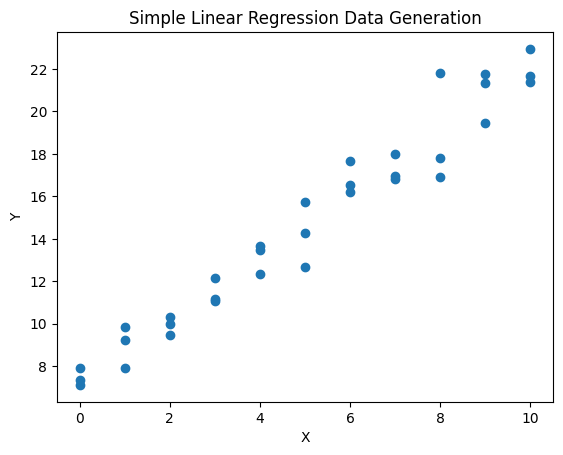

In [197]:
#import some modules needed
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
from sklearn.linear_model import LinearRegression

rng = default_rng(32)
beta_0 = 7
beta_1 = 1.5
# get three 'values' of x at each integer from 0 to 10.
x = np.array(list(np.linspace(start = 0, stop = 10, num = 11))*3)
n = 33
#create the 'responses' modeled from the line plus a random deviation
y = beta_0 + beta_1*x + rng.standard_normal(n)
#visualize the data
plt.scatter(x = x, y = y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression Data Generation')
plt.show()


## use sklearn to obtain the estimate for the slope

Estimated Slope: [1.47450564]


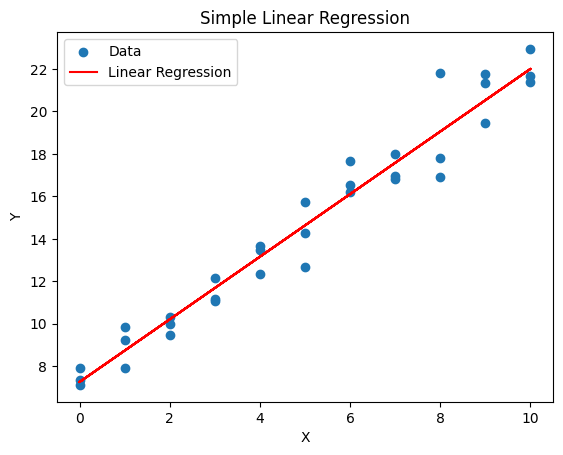

In [198]:
rng = default_rng(32)
beta_0 = 7
beta_1 = 1.5

# get three 'values' of x at each integer from 0 to 10.
x = np.array(list(np.linspace(start = 0, stop = 10, num = 11))*3)
n = 33

#create the 'responses' modeled from the line plus a random deviation
y = beta_0 + beta_1*x + rng.standard_normal(n)

# Reshape x to a 2D array
x_reshaped = x.reshape(-1, 1)

# declare linear regression model
model = LinearRegression()
model.fit(x_reshaped, y)

# Get the intercept and coefficients
estimated_intercept = model.intercept_
estimated_slope = model.coef_

# Print the estimated slope
print(f"Estimated Slope: {estimated_slope}")

# Visualize the data and the regression line
plt.scatter(x=x, y=y, label='Data')
plt.plot(x, model.predict(x_reshaped), color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

## Repeat the above process 5000 times

In [199]:
def findSlope() :
    # Set random seed for reproducibility
    np.random.seed(15)

    #  Values for intercept and slope
    beta_0 = 7
    beta_1 = 1.5

    # Number of data points
    n = 33

    # Get x values
    x = np.array(list(np.linspace(start = 0, stop = 10, num = 11))*3)

    #create the 'responses' modeled from the line plus a random deviation
    y = beta_0 + beta_1*x + rng.standard_normal(n)

    # Reshape x
    x_reshaped = x.reshape(-1, 1)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(x_reshaped, y)

    return model.coef_[0]




# Number of iterations
total_count = 5000

# Arrays to store slope estimates
slope_list =  np.zeros(total_count)

# Get slope 5000 times
for i in range(total_count):
    slope =  findSlope()
    # Set the slope value in array
    slope_list[i] = slope



for i in range (10) :
  print(slope_list[i])


1.4528055158392057
1.53315358403458
1.4720317918450376
1.4416689815068975
1.4815679715262047
1.5222322504973513
1.4418903222778285
1.4938105357538867
1.5264225658127046
1.6185099896499326


## Create a histogram of the sample slope values you found

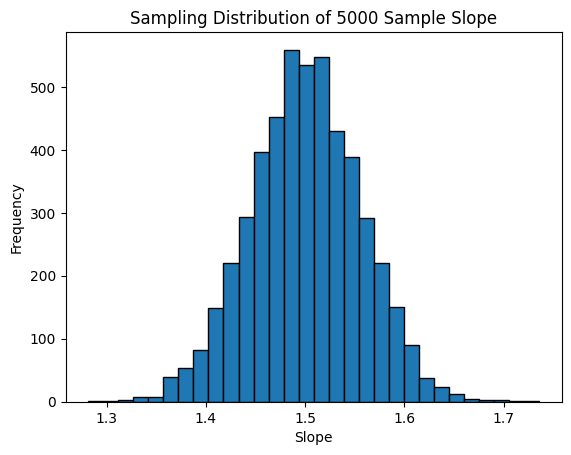

In [200]:
# Plot histogram of slope estimates
plt.hist(slope_list, bins=30, edgecolor='black')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.title(f'Sampling Distribution of {total_count} Sample Slope' )
plt.show()

## Use your sampling distribution to approximate the probability of observing a sample slope larger
Probablity of getting sample slope larger than 1.65

In [201]:
specific_value = 1.65
# Convert estimated_slopes to a NumPy array
slope_array = np.array(slope_list)

# Find all the values in the list which is larger than given 1.65. Now add how many occurances of such.
# And than devide that total occurances by the total length of list which is 5000
total_count = sum(slope_list > 1.65)
print ('Total count of occurances when slope is larger than 1.65 is ' , total_count)
p_value =   total_count/total_count
print("Probability of getting a slope larger than 1.65:", p_value)


Total count of occurances when slope is larger than 1.65 is  19
Probability of getting a slope larger than 1.65: 1.0


### Interpretation


Interpretation: \
The probability of observing a sample slope larger than 1.65 serves as an indication of the likelihood of obtaining a slope estimate as extreme as 1.65 or more extreme

In the context of a hypothesis test: \
The probablity is much less than significal level which is idealy 0.05. So we will reject the null hypothesis that probablity of getting sample slope larger than 1.65 is zero. Null hypothesis contains some kind of equality which is 'probablity of getting sample slope larger than 1.65 is zero' in this case. \
We will accept the alternate hypthesis that there is a better chance of getting sample slope larger than 1.65




## 3 example for each letter in the CRUD acronym in the context of this database

### CRUD

### Create table
sql_query = '''
        CREATE TABLE customers (name VARCHAR(255), address VARCHAR(255));
        '''
cursor = con.cursor()
cursor.execute(sql_query)

### Create record - create or add records to a table
sql_query = '''
        INSERT INTO customers (name, address) VALUES ("John", "Highway 21");
        '''
cursor = con.cursor()
cursor.execute(sql_query)

### Read record - Fetch records from table
sql_query = '''
        SELECT * FROM customers;
        '''
cursor = con.cursor()
res = cursor.execute(sql_query)


### Update record - Update a record in table based on some filteration
sql_query = '''
        UPDATE customers SET address = 'Canyon 123' WHERE address = 'Valley 345';
        '''
execute_query(con, sql_query)

### Delete record - Delete a recrod from table
sql_query = '''
        DELETE FROM customers WHERE address = 'Mountain 21';
        '''
execute_query(con, sql_query)

## What is the purpose of the HAVING clause when writing SQL code?


The HAVING clause is used to filter the results of a GROUP BY query based on specified conditions related to aggregated values. It allows to apply conditions specifically to the results of aggregate functions after grouping, enabling the selection of grouped data that meets certain criteria. \

The HAVING clause in SQL is used to filter the results of a GROUP BY query based on a specified condition. While the WHERE clause is used to filter rows before they are grouped and aggregated, the HAVING clause is applied after the grouping and aggregation has taken place.

The primary purpose of the HAVING clause is to filter the results of a grouped query based on aggregate conditions. It is typically used in conjunction with the GROUP BY clause and aggregate functions such as SUM, COUNT, AVG, etc.

Example \
SELECT department, AVG(salary) as avg_salary
FROM employees
GROUP BY department
HAVING AVG(salary) > 50000;



# Part II - Querying a database

## Introduction

* **cursor.execute**:
Associated Library: Typically used in conjunction with the database connection libraries such as sqlite3, psycopg2 (for PostgreSQL), mysql-connector-python (for MySQL), etc.
Purpose: Executes SQL queries on a database. It is a part of the database connection cursor object (cursor) and is used for executing SQL commands directly.

* **pd.read_sql**:
Associated Library: Part of the pandas library.
Purpose: Reads the result of a SQL query directly into a Pandas DataFrame. It simplifies the process of retrieving data from a SQL database and converting it into a DataFrame.

In summary, cursor.execute is used when want to execute SQL commands directly on a database connection cursor, while pd.read_sql is used when you want to retrieve data from a SQL query and load it into a Pandas DataFrame, providing a more convenient way to work with the data in a tabular format.

In [202]:
import sqlite3
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ST590/HW05/lahman2016.sqlite'

con = sqlite3.connect(file_path, isolation_level=None)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1 Connect to the database and then look at all of the tables in the database

In [203]:

# Query to get all table names
query = "SELECT name FROM sqlite_master WHERE type='table';"

# Use pandas read_sql() to execute the query and fetch the tables as a DataFrame
tables = pd.read_sql(query, con)

# Print the DataFrame containing table names
print(tables)


                   name
0           AllstarFull
1           Appearances
2        AwardsManagers
3         AwardsPlayers
4   AwardsShareManagers
5    AwardsSharePlayers
6               Batting
7           BattingPost
8        CollegePlaying
9              Fielding
10           FieldingOF
11      FieldingOFsplit
12         FieldingPost
13           HallOfFame
14            HomeGames
15             Managers
16         ManagersHalf
17               Master
18                Parks
19             Pitching
20         PitchingPost
21             Salaries
22              Schools
23           SeriesPost
24                Teams
25      TeamsFranchises
26            TeamsHalf
27  hallOfFame_pitchers


## 2 SQL query using pd.read_sql() that returns all the teams played in 2015

In [204]:
# Find the column name in Teams table just for validation purposes

cursor = con.cursor()

# Execute a SELECT query to retrieve data from the table (can be any SELECT query)
cursor.execute('SELECT * FROM Teams LIMIT 1')

# Fetch the column names from the cursor description
column_names = [description[0] for description in cursor.description]

# Print or use the column names
print("Column Names:", column_names)


Column Names: ['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome', 'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR', 'teamIDlahman45', 'teamIDretro']


In [205]:
# SQL query to retrieve teams that played in the year 2015 from the Teams table
query = "SELECT * FROM Teams WHERE yearID = 2015;"

# Use pandas read_sql() to execute the query
teams_2015 = pd.read_sql(query, con)

# Print the DataFrame
teams_2015.head(10)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,2015,AL,BAL,BAL,E,3,162,78,81,81,...,134,0.987,Baltimore Orioles,Oriole Park at Camden Yards,2281202,103,104,BAL,BAL,BAL
1,2015,AL,BOS,BOS,E,5,162,81,78,84,...,148,0.984,Boston Red Sox,Fenway Park II,2880694,104,107,BOS,BOS,BOS
2,2015,AL,CHA,CHW,C,4,162,81,76,86,...,159,0.983,Chicago White Sox,U.S. Cellular Field,1755810,92,93,CHW,CHA,CHA
3,2015,AL,CLE,CLE,C,3,161,80,81,80,...,136,0.987,Cleveland Indians,Progressive Field,1388905,106,106,CLE,CLE,CLE
4,2015,AL,DET,DET,C,5,161,81,74,87,...,165,0.986,Detroit Tigers,Comerica Park,2726048,97,98,DET,DET,DET
5,2015,AL,HOU,HOU,W,2,162,81,86,76,...,131,0.986,Houston Astros,Minute Maid Park,2153585,97,99,HOU,HOU,HOU
6,2015,AL,KCA,KCR,C,1,162,81,95,67,...,138,0.985,Kansas City Royals,Kauffman Stadium,2708549,104,103,KCR,KCA,KCA
7,2015,AL,LAA,ANA,W,3,162,81,85,77,...,108,0.984,Los Angeles Angels of Anaheim,Angel Stadium of Anaheim,3012765,94,95,LAA,ANA,ANA
8,2015,AL,MIN,MIN,C,2,162,81,83,79,...,150,0.986,Minnesota Twins,Target Field,2220054,103,104,MIN,MIN,MIN
9,2015,AL,NYA,NYY,E,2,162,81,87,75,...,135,0.985,New York Yankees,Yankee Stadium III,3193795,99,101,NYY,NYA,NYA


## 3 SQL query that returns all players in the hall of fame, the year they were voted

In [206]:
# SQL query to retrieve players in the Hall of Fame with induction details
query = """
SELECT playerID, yearid, category
FROM HallOfFame
WHERE inducted = 'Y';
"""

# Use pandas read_sql() to execute the query
players_hallOfFame_voted = pd.read_sql(query, con)

# Print the DataFrame
players_hallOfFame_voted.head()

,playerID,yearid,category
0,aaronha01,1982,Player
1,alexape01,1938,Player
2,alomaro01,2011,Player
3,alstowa01,1983,Manager
4,andersp01,2000,Manager


## 4 SQL query return all unique managers of the Pittsburgh Pirates

In [207]:
# Validations if PIT is a team in Managers

query = 'SELECT DISTINCT teamID FROM Managers'
distinct_values = pd.read_sql(query, con)['teamID'].tolist()

# Print or use the distinct values
print("Distinct Values:", distinct_values)
if 'PIT' in distinct_values:
    print("pittsburgh managers in Hall of fame")
else:
    print("pittsburgh managers try next year")

Distinct Values: ['BS1', 'CH1', 'CL1', 'FW1', 'NY2', 'PH1', 'RC1', 'TRO', 'WS3', 'BL1', 'BR1', 'BR2', 'MID', 'WS4', 'BL4', 'ELI', 'PH2', 'WS5', 'CH2', 'HR1', 'KEO', 'NH1', 'PH3', 'SL1', 'SL2', 'WS6', 'BSN', 'CHN', 'CN1', 'HAR', 'LS1', 'NY3', 'PHN', 'SL3', 'IN1', 'ML2', 'PRO', 'BFN', 'CL2', 'SR1', 'TRN', 'WOR', 'DTN', 'BL2', 'CN2', 'LS2', 'PH4', 'PT1', 'SL4', 'CL5', 'NY1', 'NY4', 'PHI', 'ALT', 'BLU', 'BR3', 'BSU', 'CHU', 'CNU', 'IN2', 'KCU', 'MLU', 'PHU', 'RIC', 'SLU', 'SPU', 'TL1', 'WIL', 'WS7', 'WSU', 'SL5', 'KCN', 'WS8', 'CL3', 'IN3', 'PIT', 'KC2', 'CL4', 'CL6', 'BFP', 'BL3', 'BR4', 'BRO', 'BRP', 'BSP', 'CHP', 'CIN', 'CLP', 'NYP', 'PHP', 'PTP', 'RC2', 'SR2', 'TL2', 'BS2', 'CN3', 'ML3', 'WS9', 'BLN', 'LS3', 'SLN', 'WAS', 'BLA', 'BOS', 'CHA', 'CLE', 'DET', 'MLA', 'PHA', 'WS1', 'SLA', 'NYA', 'BLF', 'BRF', 'BUF', 'CHF', 'IND', 'KCF', 'PTF', 'SLF', 'NEW', 'ML1', 'BAL', 'KC1', 'LAN', 'SFN', 'LAA', 'MIN', 'WS2', 'HOU', 'NYN', 'CAL', 'ATL', 'OAK', 'KCA', 'MON', 'SDN', 'SE1', 'ML4', 'TEX', 'S

In [208]:
# SQL query to retrieve unique managers of the Pittsburgh Pirates from the Managers table
query = """
SELECT DISTINCT playerID
FROM Managers
WHERE teamID = 'PIT';
"""

# Use pandas read_sql() to execute the query
pittsburgh_managers = pd.read_sql(query, con)

# Print the DataFrame
pittsburgh_managers.head()

,playerID
0,bezdehu99
1,bragabo01
2,buckeal99
3,burnsto01
4,burwebi01


## 5 SQL code and the HallOfFame and Managers tables to return all of the playerIDs for the people that managed for a team that were inducted into the hall of fame.

In [209]:
# Ignore this Data check and validations
query = "SELECT * FROM Managers where plyrMgr = 'Y' and teamId = 'PIT'"
#query = "SELECT distinct m.playerID FROM Managers AS m JOIN HallOfFame AS h ON m.playerID = h.playerID \
#WHERE  m.teamId = 'PIT' and h.inducted = 'Y' and m.plyrMgr = 'N'  "

# Use pandas read_sql() to execute the query
Managers = pd.read_sql(query, con)
print(Managers)
# Print the DataFrame
#Managers.head(10)

     playerID  yearID teamID lgID  inseason    G    W    L  rank plyrMgr
0   dunlafr01    1889    PIT   NL         2   17    7   10     5       Y
1   hanlone01    1889    PIT   NL         3   46   26   18     5       Y
2   heckegu01    1890    PIT   NL         1  138   23  113     8       Y
3   hanlone01    1891    PIT   NL         1   78   31   47     8       Y
4   burnsto01    1892    PIT   NL         2   60   27   32     4       Y
5    mackco01    1894    PIT   NL         2   23   12   10     7       Y
6    mackco01    1895    PIT   NL         1  135   71   61     7       Y
7    mackco01    1896    PIT   NL         1  131   66   63     6       Y
8   donovpa01    1897    PIT   NL         1  135   60   71     8       Y
9   donovpa01    1899    PIT   NL         2  131   69   58     7       Y
10  clarkfr01    1900    PIT   NL         1  140   79   60     2       Y
11  clarkfr01    1901    PIT   NL         1  140   90   49     1       Y
12  clarkfr01    1902    PIT   NL         1  142  1

In [210]:
# SQL query to retrieve playerIDs for managers inducted into the Hall of Fame
# Manager table plyrMgr column us used to filter 'playerIDs for the people that managed for a team'
query = """
  SELECT DISTINCT m.playerID
  FROM Managers AS m
  JOIN HallOfFame AS h
  ON m.playerID = h.playerID
  WHERE h.inducted = 'Y' AND m.plyrMgr = 'Y';
"""

# Use pandas read_sql() to execute the query
managers_hallOfFame_inducted = pd.read_sql(query, con)

# Print the result
print(managers_hallOfFame_inducted)

# Programmatically report the number of such people
total_count = len(managers_hallOfFame_inducted)
print(f"Number of managers inducted into the Hall of Fame: {total_count}")

# Or loop over the dataframe to count the records.

     playerID
0   ansonca01
1   bancrda01
2   bottoji01
3   boudrlo01
4   bresnro01
..        ...
58   wardjo01
59  whitede01
60  wrighge01
61  wrighha01
62  youngcy01

[63 rows x 1 columns]
Number of managers inducted into the Hall of Fame: 63


## 6 Now use the same two tables (HallOfFame and mANAGERS) and an SQL query to return every season managed by each manager that made it to the hall of fame

In [211]:
# SQL query to retrieve every season managed by each Hall of Fame manager
# I am not sure if m.plyrMgr = 'Y' should go in this query as it is not mentioned about 'playerIDs for the people that managed for a team'
query = """
SELECT m.playerID, m.G, m.W, m.L
FROM Managers AS m
JOIN HallOfFame AS h
ON m.playerID = h.playerID
WHERE h.inducted = 'Y';
"""

# Use pandas read_sql() to execute the query
managers_hallOfFame = pd.read_sql(query, con)

# Calculate overall win/loss records for each Hall of Fame manager
win_loss_records = managers_hallOfFame.groupby('playerID').agg({'W': 'sum', 'L': 'sum'}).reset_index()

# Calculate win/loss percentage
win_loss_records['WinLossPercentage'] = win_loss_records['W'] / (win_loss_records['W'] + win_loss_records['L'])

# Sort the DataFrame by win/loss percentage (from largest to smallest)
sorted_df = win_loss_records.sort_values(by='WinLossPercentage', ascending=False)

# Print the result
print(sorted_df)

     playerID     W     L  WinLossPercentage
90  wrighge01    59    25           0.702381
75  spaldal01    78    47           0.624000
55  mccarjo99  2125  1333           0.614517
18  comisch01   840   541           0.608255
72  seleefr99  1284   862           0.598322
..        ...   ...   ...                ...
83  wallabo01    62   154           0.287037
7   bottoji01    21    56           0.272727
3   applilu01    10    30           0.250000
82  wagneho01     1     4           0.200000
19  connoro01     8    37           0.177778

[93 rows x 4 columns]


## 7 Using SQL, construct a table of hall of fame pitchers that gives the playerID and their total (sum) for GS, G, W, L, IPOuts, CG, SHO, and SV columns

In [213]:
# The question says construct a table. I created a dataframe rather than a database table.
# SQL query to retrieve total pitching statistics for Hall of Fame pitchers
query = """
SELECT p.playerID,
       SUM(p.GS) as TotalGS,
       SUM(p.G) as TotalG,
       SUM(p.W) as TotalW,
       SUM(p.L) as TotalL,
       SUM(p.IPOuts) as TotalIPOuts,
       SUM(p.CG) as TotalCG,
       SUM(p.SHO) as TotalSHO,
       SUM(p.SV) as TotalSV
FROM Pitching AS p
JOIN HallOfFame AS h
ON p.playerID = h.playerID
WHERE h.inducted = 'Y'
GROUP BY p.playerID;
"""

# Use pandas read_sql() to execute the query
hallOfFame_pitchers = pd.read_sql(query, con)

table_name = 'hallOfFame_pitchers'
cursor = con.cursor()
# Drop the table if it exists
cursor.execute('DROP TABLE IF EXISTS hallOfFame_pitchers')
# Write the DataFrame to a SQL table
hallOfFame_pitchers.to_sql(table_name, con, index=False, if_exists='replace')

# Print the result
print(hallOfFame_pitchers)

      playerID  TotalGS  TotalG  TotalW  TotalL  TotalIPOuts  TotalCG  \
0    alexape01      599     696     373     208        15570      437   
1    ansonca01        0       3       0       1           12        0   
2    becklja01        1       1       0       1           12        0   
3    bendech01      334     459     212     127         9051      255   
4    blylebe01      685     692     287     250        14910      242   
..         ...      ...     ...     ...     ...          ...      ...   
96   willivi01      471     513     249     205        11988      388   
97   wrighge01        0       3       0       1           15        0   
98   wrighha01        7      34       4       4          298        0   
99    wynnea01      612     691     300     244        13692      290   
100  youngcy01      815     906     511     316        22064      749   

     TotalSHO  TotalSV  
0          90       32  
1           0        1  
2           0        0  
3          40       34 

## 8  For all of the hall of fame pitchers, use SQL to create a table of their batting statistics

In [214]:
# This is for validation purposes. Please ignore this block of code.
query = "SELECT playerId, AB, R, H, HR, RBI, BB,  SO FROM batting;"

# Use pandas read_sql() to execute the query
temp = pd.read_sql(query, con)
print(temp)
# Print the result
temp.head(10)

         playerID   AB   R    H  HR   RBI  BB    SO
0       aardsda01    0   0    0   0   0.0   0   0.0
1       aardsda01    2   0    0   0   0.0   0   0.0
2       aardsda01    0   0    0   0   0.0   0   0.0
3       aardsda01    1   0    0   0   0.0   0   1.0
4       aardsda01    0   0    0   0   0.0   0   0.0
...           ...  ...  ..  ...  ..   ...  ..   ...
102811  zwilldu01  592  91  185  16  95.0  46  68.0
102812  zwilldu01  548  65  157  13  94.0  67  65.0
102813  zwilldu01   53   4    6   1   8.0   4   6.0
102814   zychto01    0   0    0   0   0.0   0   0.0
102815   zychto01    0   0    0   0   0.0   0   0.0

[102816 rows x 8 columns]


,playerID,AB,R,H,HR,RBI,BB,SO
0,aardsda01,0,0,0,0,0.0,0,0.0
1,aardsda01,2,0,0,0,0.0,0,0.0
2,aardsda01,0,0,0,0,0.0,0,0.0
3,aardsda01,1,0,0,0,0.0,0,1.0
4,aardsda01,0,0,0,0,0.0,0,0.0
5,aardsda01,0,0,0,0,0.0,0,0.0
6,aardsda01,0,0,0,0,0.0,0,0.0
7,aardsda01,0,0,0,0,0.0,0,0.0
8,aardsda01,1,0,0,0,0.0,0,1.0
9,aaronha01,468,58,131,13,69.0,28,39.0


In [215]:
# I used the table constructed in above step 7
# SQL query to get batting statistics for Hall of Fame pitchers
query = """
SELECT b.playerID,
       SUM(b.AB) as TotalAB,
       SUM(b.R) as TotalR,
       SUM(b.H) as TotalH,
       SUM(b.HR) as TotalHR,
       SUM(b.RBI) as TotalRBI,
       SUM(b.BB) as TotalBB,
       SUM(b.SO) as TotalSO
FROM Batting AS b
JOIN hallOfFame_pitchers AS h ON b.playerID = h.playerID
GROUP BY h.playerID;
"""

# Use pandas read_sql() to execute the query
hallOfFame_batting = pd.read_sql(query, con)

# Print the result
print(hallOfFame_batting)

      playerID  TotalAB  TotalR  TotalH  TotalHR  TotalRBI  TotalBB  TotalSO
0    alexape01     1810     154     378       11       163       77    276.0
1    ansonca01    10277    1996    3418       97      2076      983    302.0
2    becklja01     9526    1600    2930       86      1575      616    270.0
3    bendech01     1147     102     243        6       116       75     48.0
4    blylebe01      451      19      59        0        25        5    193.0
..         ...      ...     ...     ...      ...       ...      ...      ...
96   willivi01     1493     107     248        1        84       81      8.0
97   wrighge01     2875     665     867       11       330       67    119.0
98   wrighha01      816     183     222        4       111       36     12.0
99    wynnea01     1704     136     365       17       173      141    330.0
100  youngcy01     2960     325     623       18       290       81    150.0

[101 rows x 8 columns]


## 9 Using pandas join the previous two tables together by pitcher.

In [216]:
#  hallOfFame_pitchers and hallOfFame_batting DataFrames

# Merge the two DataFrames on 'playerID'
hallOfFame_pitchers_batting = pd.merge(hallOfFame_pitchers, hallOfFame_batting, on='playerID', how='inner')

# Print the result DataFrame
hallOfFame_pitchers_batting

,playerID,TotalGS,TotalG,TotalW,TotalL,TotalIPOuts,TotalCG,TotalSHO,TotalSV,TotalAB,TotalR,TotalH,TotalHR,TotalRBI,TotalBB,TotalSO
0,alexape01,599,696,373,208,15570,437,90,32,1810,154,378,11,163,77,276.0
1,ansonca01,0,3,0,1,12,0,0,1,10277,1996,3418,97,2076,983,302.0
2,becklja01,1,1,0,1,12,0,0,0,9526,1600,2930,86,1575,616,270.0
3,bendech01,334,459,212,127,9051,255,40,34,1147,102,243,6,116,75,48.0
4,blylebe01,685,692,287,250,14910,242,60,0,451,19,59,0,25,5,193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,willivi01,471,513,249,205,11988,388,50,11,1493,107,248,1,84,81,8.0
97,wrighge01,0,3,0,1,15,0,0,0,2875,665,867,11,330,67,119.0
98,wrighha01,7,34,4,4,298,0,0,8,816,183,222,4,111,36,12.0
99,wynnea01,612,691,300,244,13692,290,49,15,1704,136,365,17,173,141,330.0
